# Алгоритмы классификации
• Логистическая регрессия
• SVM (Support Vector Machine)
• Дерево решений
• KNN
• Ансамбли
• Байесовский классификатор

# Метрики оценки качества модели
• Accuracy
• Precision
• Specificity
• Recall
• F-мера
• PR AUC
• ROC AUC

# Как рассматривать матрцу ошибок?
True Positive – модель предсказала 1 там, 
где класс был равен 1.
True Negative – модель предсказала 0 там, 
где класс был равен 0.
False Positive – модель предсказала 1 там, 
где класс был равен 0.
False Negative – модель предсказала 0 там, 
где класс был равен 1.

# Precision (точность)
Показывает, сколько 
реальных объектов класса 
среди всех тех, что 
классификатор отнес к 
этому классу

# Recall (полнота)
Отображает, какую долю 
положительных объектов 
распознает классификатор.

# Specificity (специфичность)
Насколько правильно 
классификатор не относит 
объекты к классу 1.

Точность (precision) демонстрирует способность отличать класс 1 от других 
классов, а полнота (recall) — способность алгоритма обнаруживать 
класс 1 вообще (специфичность делает то же самое, что и полнота, только для 
класса 0)

Часто хочется следить одновременно за точностью и полнотой. Для этого нужно 
обе метрики объединить в одну. Так, можно использовать гармоническое 
среднее, которое называется F1-мерой.
Если набор данных сбалансирован, т. е. распределение по классам примерно 
равномерное, то в качестве метрики обычно используют accuracy. 
Иначе нужно учитывать дисбаланс классов. Так как на практике часто хочется 
учесть и точность, и полноту, то можно использовать F1-меру. Кроме того, 
полезно посмотреть на площади под графиками PR или ROC кривых.

Для каждой задачи, исходя из ее особенностей, нужно выбирать модель и метрику качества. При выборе метрики качества лучше исходить из того, сбалансированная ли выборка.
Сбалансированная выборка:
- Точность (accuracy). Легко интерпретируемая метрика
- ROC AUC. Использует вероятности принадлежности к классам. Теоретически может работать и с неидеально сбалансированной выборкой, но при сильном дисбалансе классов становится нерепрезентативной
Несбалансированная выборка:
- Точность (precision),
- полнота (recall),
- специфичность (specificity). Стоит учитывать, что обычно нужны не каждая из них по отдельности, а их баланс
- F1-мера. Является одним числом, среднее гармоническое точности и полноты
- PR AUC. Также является одним числом, но, кроме этого, может помочь выбрать порог классификатора.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [6]:
df.shape

(400, 5)

In [7]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [8]:
df = df.drop(columns=['Gender'])

In [9]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


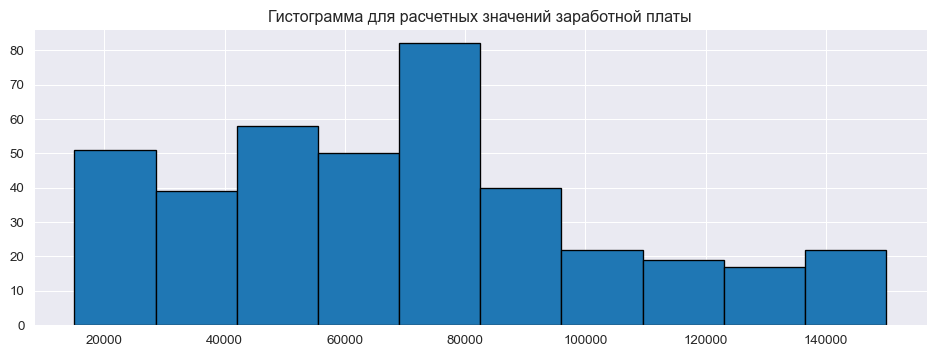

In [10]:
plt.figure(figsize=(12, 4), dpi=96)
plt.title("Гистограмма для расчетных значений заработной платы")
plt.hist(df['EstimatedSalary'], bins='sturges', edgecolor='black')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Purchased')
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [14]:
print(lr.score(X_train, y_train))
y_train_pred = lr.predict(X_train)

0.8357142857142857


In [15]:
print("\n Матрица ошибок \n")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


 Матрица ошибок 

[[170  14]
 [ 32  64]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       184
           1       0.82      0.67      0.74        96

    accuracy                           0.84       280
   macro avg       0.83      0.80      0.81       280
weighted avg       0.83      0.84      0.83       280


# SVM - Support Vector Machine

SVM - это алгоритм обучения с учителем, используемый для задач классификации и регрессии.
Целью SVM является создание гиперплоскости, которая разделяет точки данных на разные классы.
Гиперплоскость выбрана таким образом, чтобы максимально увеличить разницу между двумя классами.
Опорные векторы - это точки данных, которые находятся ближе всего к гиперплоскости

# Типы SVM
SVM может быть двух типов:
Линейный SVM:
- Для линейно разделяемых данных.
- Классифицирует с использованием прямой линии.

Нелинейный SVM:
- Для нелинейно разделяемых данных.
- Использует сложные кривые для классификации.

Где можно использовать этот метод?
- Распознавание лиц: Классифицирует изображения лиц людей, создавая вокруг них ограничивающую рамку.
- Биоинформатика: Классифицирует гены для различения белков, выявления биологических проблем и обнаружения раковых клеток.
- Категоризация текста: Классифицирует документы по различным категориям в зависимости от их содержания.
- Обобщенный интеллектуальный контроль (GPC): Обеспечивает контроль над производственными процессами.
- Распознавание рукописного текста: Распознает рукописные символы, сопоставляя их с ранее существовавшими данными.
- Классификация изображений: Классифицирует изображения по различным категориям

# Преимущества SVM
- Он обладает высоким уровнем точности
- Он очень хорошо работает с ограниченными наборами данных
- Ядро SVM содержит функцию нелинейного преобразования для преобразования сложных нелинейно разделяемых данных в линейно разделяемые данные
- Он эффективен для наборов данных, содержащих несколько объектов
- Он эффективен, когда количество объектов превышает количество точек данных
- Он использует подмножество обучающих точек в функции принятия решения или опорных векторах, что делает память SVM эффективной
- Помимо обычных ядер, также возможно указать пользовательские ядра для функции принятия решения

# Недостатки SVM
- Плохо работает с большими наборами данных
- Иногда время обучения с помощью SVM может быть большим
- Если количество функций значительно превышает количество точек данных, крайне важно избегать переобучения при выборе функций ядра и условий регуляризации
- Оценки вероятности не предоставляются SVMs напрямую, скорее, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки
- Лучше всего работает на небольших наборах выборок из-за большого времени обучения

Построим и обучим модел с использованием универсальных банковских записей и классификации того, имеет ли клиент право использовать кредитную карту или нет.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Datasets/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [17]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [20]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
df1 = df.drop(["ID", "ZIP Code"], axis=1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<Axes: title={'center': 'Корреляция между всеми фичами'}>

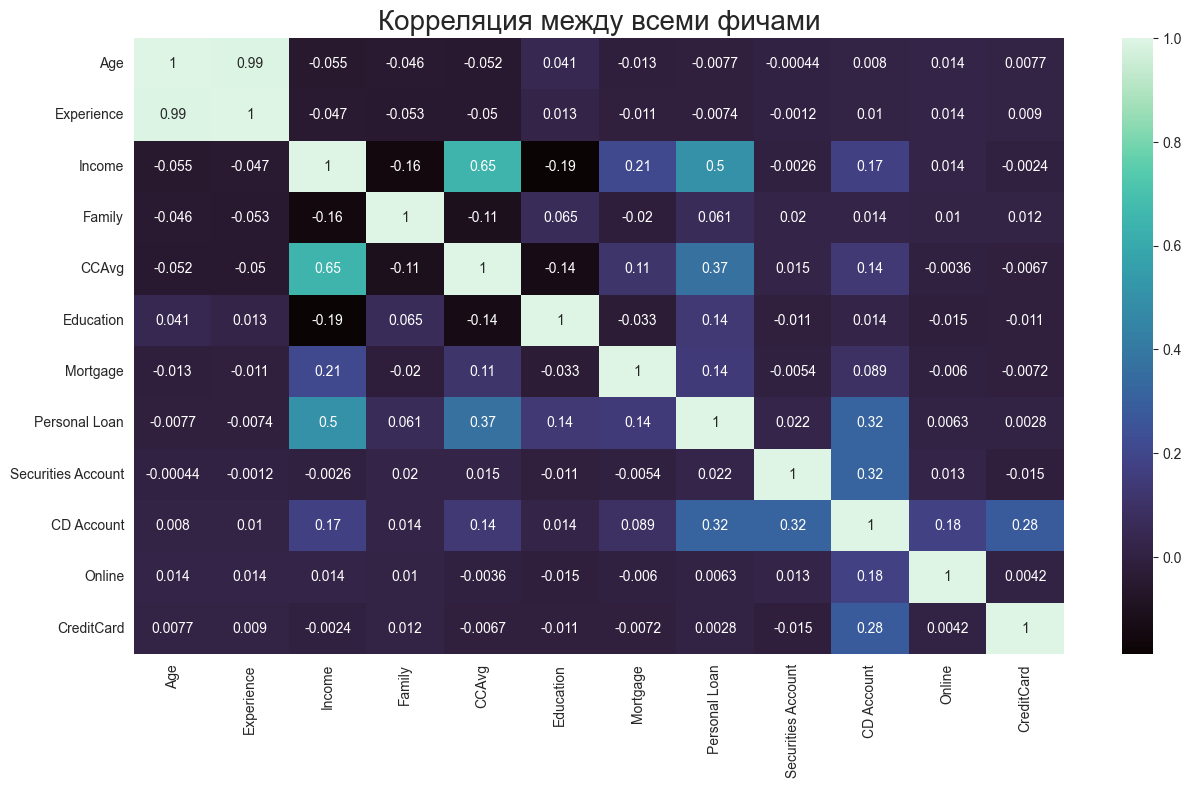

In [23]:
plt.figure(figsize=(15, 8))
plt.title("Корреляция между всеми фичами", fontsize=20)
sns.heatmap(df1.corr(), annot=True, cmap='mako')

In [24]:
df1.shape

(5000, 12)

Создадим два класса

In [25]:
class_0 = df1[df1.CreditCard == 0]
class_0.shape

(3530, 12)

In [26]:
class_1 = df1[df1.CreditCard == 1]
class_1.shape

(1470, 12)

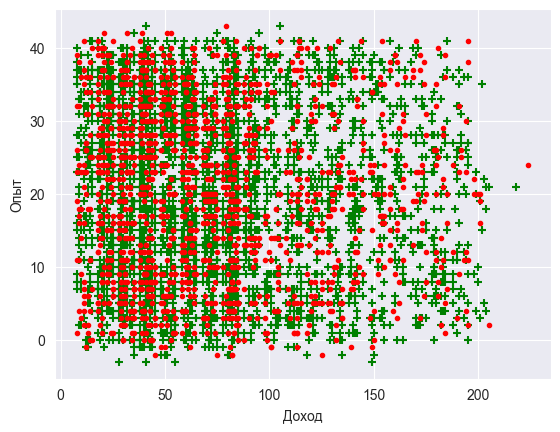

In [27]:
plt.xlabel('Доход')
plt.ylabel('Опыт')
plt.scatter(class_0['Income'], class_0['Experience'], color='green', marker='+')
plt.scatter(class_1['Income'], class_1['Experience'], color='red', marker='.')

Нужно нормировать данные. Для этого воспользуемся StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard', axis=1)).transform(df1.drop('CreditCard', axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


Разделим столбцы на зависимую переменную (x) и независимую переменную (y).

In [29]:
x = df_scaled
y = df1['CreditCard']

Воспользуемся SVM

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Model accuracy : {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


Построим матрицу ошибок

<Axes: >

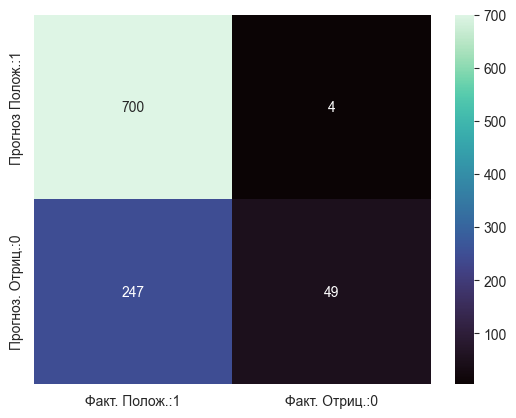

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Факт. Полож.:1', 'Факт. Отриц.:0'],
                         index=['Прогноз Полож.:1', 'Прогноз. Отриц.:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000


Мы можем использовать разные ядра для SVM

In [35]:
# Сигмоида
Poly_svc = SVC(kernel='sigmoid', C=1).fit(x_train, y_train)
y_pred = Poly_svc.predict(x_test)
print('Accuracy: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.629


In [36]:
# Линейное ядро
linear_classifier = SVC(kernel='linear').fit(x_train, y_train)
y_pred = linear_classifier.predict(x_test)
print('Accuracy: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.747


In [37]:
# Многочленное ядро
Poly_svc = SVC(kernel='poly', C=1).fit(x_train, y_train)
y_pred = Poly_svc.predict(x_test)
print('Accuracy: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.749


In [38]:
# Гауссиан
rbf_svc = SVC(kernel='rbf').fit(x_train, y_train)
y_pred = rbf_svc.predict(x_test)
print('Accuracy: {0:0.3f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.749


<Axes: >

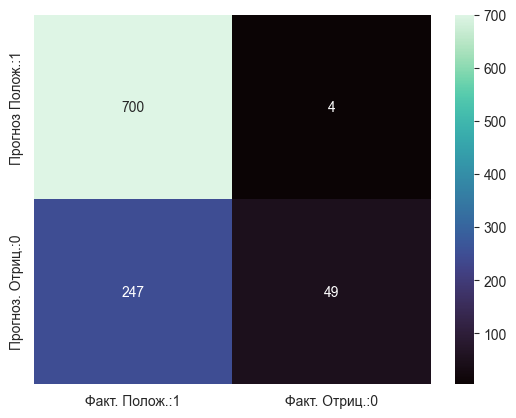

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Факт. Полож.:1', 'Факт. Отриц.:0'],
                         index=['Прогноз Полож.:1', 'Прогноз. Отриц.:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000

